In [3]:
### Data digitized fro figure 3 of
### Walker, K.J., Williams, C.T., Oladepo, F.O. et al. 
### A high-throughput HPLC method for simultaneous quantification of pyrethroid and pyriproxyfen in long-lasting insecticide-treated nets. 
### Sci Rep 12, 9715 (2022). https://doi.org/10.1038/s41598-022-13768-z
###



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.nonparametric.smoothers_lowess import lowess     # A function for interpolating a plot using the locally weighed scatterplot smoothing method. Returns smoothed x,y points
from scipy.interpolate import CubicSpline                         # A function for interpolating a plot using the cubic spline method. Returns an interpolation function.
from scipy.interpolate import interp1d                            # A function for interpolating a plot using the connect-the-dots method. Returns an interpolation function.
from scipy.interpolate import make_smoothing_spline               # A function for interpolating a plot using a Bspline algorithm. Returns an interpolation function.



github_location = "https://raw.githubusercontent.com/blinkletter/3530Biochem/ReactionKinetics/"
github_location = "/Users/blink/github/3530Biochem/ReactionKinetics/"

image_path = "https://raw.githubusercontent.com/blinkletter/3530Biochem/main/folder/images/"

github_data_location = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/data/"
github_styles_location = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/styles/"

style = "tufte.mplstyle"
style_file = github_styles_location + style
plt.style.use(style_file)        

file_name = "DigitizedDataset.csv"  # Change this filename to access the other data sets

##############################################################
### Import the data and perform calculations
##############################################################

Filename = github_location + file_name

df = pd.read_csv(Filename, 
                 delimiter = ",", 
                 skipinitialspace=True, 
#                 index_col="Substituent", 
                 comment = "#") 


df.sort_values(by=["time (min)"], axis="rows", ascending=True, inplace=True)

#df.sort_values(by=[sigmatype], inplace=True)    # sort according to sigma so we can pick the left-most and right-most points more easily


x = df["time (min)"]
y = df["A_232"]



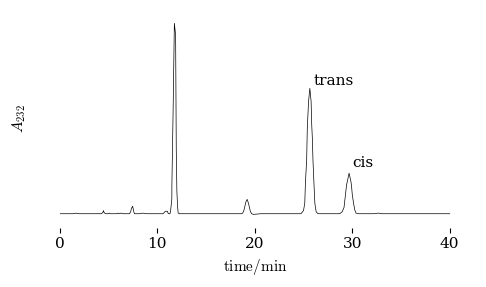

In [12]:


## Interpolate plot points. We can use a linear interpolation between points or cubic spline

#interpolation = interp1d(x, y, kind='linear')
#interpolation = CubicSpline(x, y)

interpolation = make_smoothing_spline(x, y,      ### The x and y data
                                      w=None,    ### A list of weights for each point (default = None)
                                      lam=0.000001)   ### A factor for the degree of smoothing. Change this to change the smoothness.

############################
### Set labels and scale ###
############################

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,3))  
ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   

ax.set(
#    title="HPLC Chromatogram",       
          ylabel=r"$A_{232}$", 
          xlabel=r"$\rm time /min$",                
#          xlim=[-.9,.9],                  
#          ylim=[-6,-1]
         )

x1 = np.linspace(0,np.max(x),1000)
y1 = interpolation(x1)

ax.yaxis.set_major_locator(plt.NullLocator())
ax.text(26,1100,"trans")
ax.text(30,400,"cis")
ax.plot(x,y, linewidth = 0.5)
plt.savefig("test.pdf")

In [ ]:
### FIND DUPLICATE VALUES IN A DATA SERIES

duplicate_values = df['time (min)'].duplicated()
display(duplicate_values)

for q in range(len(x)):
    if duplicate_values[q] == True:
        print(q)